In [2]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import seaborn as sns

plt.style.use('fivethirtyeight')

/Users/raficg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def master_df(chamber):
    master = pd.DataFrame()
    fpath='../congress-data/%s/' % chamber
    files=os.listdir(fpath)
    for file in files:
        
        congress = int(file.split('_')[1].split('.')[0])
        df = pd.read_csv(fpath + file, index_col=0, parse_dates=['dob'])
        df['congress'] = congress
        
        master = master.append(df, ignore_index=True)
    
    return master

In [4]:
house = master_df('house')
senate = master_df('senate')

## Looking at House

In [10]:
house = house[house['leadership_role'] != 'Speaker of the House']
house = house[house['party'].isin(['D', 'R'])]

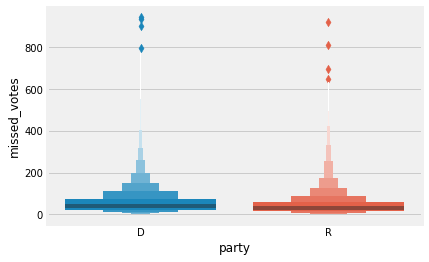

In [11]:
sns.boxenplot(x=house.party, y=house.missed_votes, data=house)

In [12]:
rep_missed = house[house['party'] == 'R']['missed_votes']
dem_missed = house[house['party'] == 'D']['missed_votes']

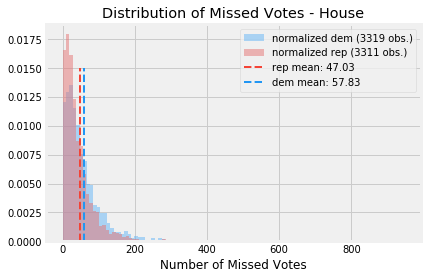

In [15]:
fig, ax = plt.subplots()

r_mean = np.mean(rep_missed)
d_mean = np.mean(dem_missed)

ax.hist(dem_missed, color='#64b5f6', label='normalized dem (%d obs.)' % len(dem_missed), bins=100, normed=1, alpha=0.5)
ax.hist(rep_missed, color='#e57373', label='normalized rep (%d obs.)' % len(rep_missed), bins=100, normed=1, alpha=0.5)
ax.vlines(r_mean, 0, 0.015, color='#f44336', linestyle='--', linewidth=2, label='rep mean: %.2f' % r_mean)
ax.vlines(d_mean, 0, 0.015, color='#2196f3', linestyle='--', linewidth=2, label='dem mean: %.2f' % d_mean)
ax.legend()
ax.set_xlabel('Number of Missed Votes');
ax.set_title('Distribution of Missed Votes - House');

In [14]:
print('Rep Sample Size: %d' % len(rep_missed))
print('Dem Sample Size: %d' % len(dem_missed))

Rep Sample Size: 3311
Dem Sample Size: 3319


In a given session of Congress, Democratic representatives miss 57.83 votes on average, while Republican representatives miss 47.03 votes on average. The question is, is this significant?

$$H_0: \mu_d = \mu_r$$
$$H_a: \mu_d > \mu_r$$

We want to run a 2-tail t-test. Our alpha threshold will be 0.05.

In [16]:
t_stat, p_val = scs.ttest_ind(rep_missed, dem_missed)
print(p_val)

3.6793114687582515e-12


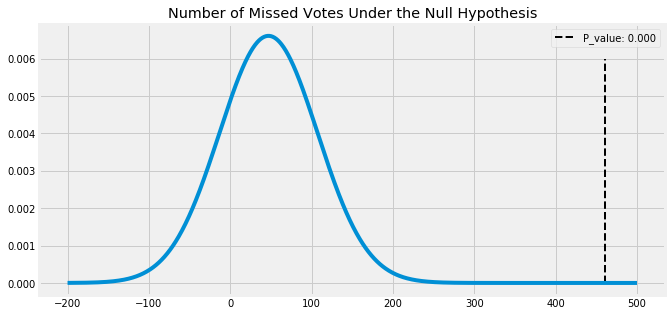

In [18]:
dist_m = scs.norm(np.mean(rep_missed), np.std(rep_missed))
y = dist_m.ppf(1 - p_val)
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-200, 500, 1000)
ax.plot(x, dist_m.pdf(x))
ax.vlines(y, 0, 0.006, linestyle='dashed', linewidth=2, label='P_value: %.3f' % p_val)
fill_space = np.linspace(y, 300, 500)
ax.fill_between(fill_space, 0, dist_m.pdf(fill_space), alpha=0.5)
ax.set_title('Number of Missed Votes Under the Null Hypothesis')
ax.legend();

Conclusion: Democrat representatives miss more votes on average then Republican's, and this is statistically. significant.

## Looking at Senate

In [19]:
sessions_to_ids = {102: ['G000321', 'H000206', 'K000146'],
                   106: ['M000303'],
                   110: ['M000303', 'B000444', 'B000953', 'C001041', 'D000388', 'O000167'],
                   108: ['E000286', 'G000352', 'K000148', 'L000304'],
                   114: ['C001098', 'R000595', 'S000033', 'G000359'],
                   116: ['S000033', 'B001267', 'B001288', 'G000555', 'H001075', 'K000367', 'W000817']}

In [20]:
to_drop = []
for key in sessions_to_ids.keys():
    c = senate[senate['congress'] == key]
    index = c[c['id'].isin(sessions_to_ids[key])].index
    to_drop.extend(index)

senate = senate[~senate.index.isin(to_drop)]

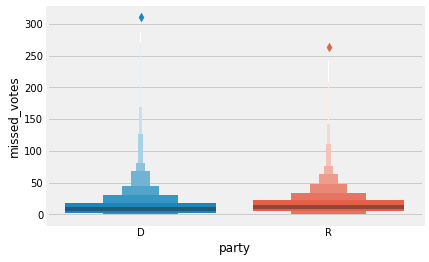

In [21]:
senate = senate[senate['party'].isin(['D', 'R'])]
sns.boxenplot(x=senate.party, y=senate.missed_votes, data=senate)

In [22]:
rep_missed = senate[senate['party'] == 'R']['missed_votes']
dem_missed = senate[senate['party'] == 'D']['missed_votes']

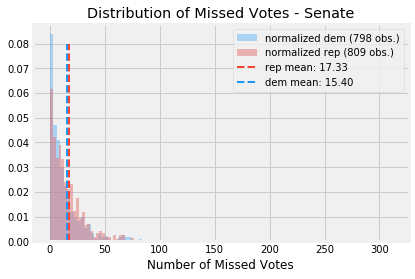

In [25]:
fig, ax = plt.subplots()

r_mean = np.mean(rep_missed)
d_mean = np.mean(dem_missed)

ax.hist(dem_missed, color='#64b5f6', label='normalized dem (%d obs.)' % len(dem_missed), bins=100, normed=1, alpha=0.5)
ax.hist(rep_missed, color='#e57373', label='normalized rep (%d obs.)' % len(rep_missed), bins=100, normed=1, alpha=0.5)
ax.vlines(r_mean, 0, 0.08, color='#f44336', linestyle='--', linewidth=2, label='rep mean: %.2f' % r_mean)
ax.vlines(d_mean, 0, 0.08, color='#2196f3', linestyle='--', linewidth=2, label='dem mean: %.2f' % d_mean)
ax.legend()
ax.set_xlabel('Number of Missed Votes');
ax.set_title('Distribution of Missed Votes - Senate');

In [26]:
print('Rep Sample Size: %d' % len(rep_missed))
print('Dem Sample Size: %d' % len(dem_missed))

Rep Sample Size: 809
Dem Sample Size: 798


In a given session of Congress, Democratic Senators miss 15.40 votes on average, while Republican Senators miss 17.33 votes on average. The question is, is this significant?

$$H_0: \mu_d = \mu_r$$
$$H_a: \mu_d > \mu_r$$

We want to run a 2-tail t-test. Our alpha threshold will be 0.05.

In [27]:
t_stat, p_val = scs.ttest_ind(rep_missed, dem_missed)
print(p_val)

0.10181523713842756


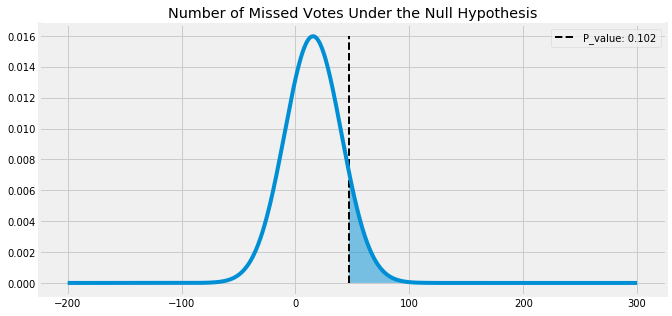

In [31]:
dist_m = scs.norm(np.mean(dem_missed), np.std(dem_missed))
y = dist_m.ppf(1 - p_val)
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-200, 300, 1000)
ax.plot(x, dist_m.pdf(x))
ax.vlines(y, 0, 0.016, linestyle='dashed', linewidth=2, label='P_value: %.3f' % p_val)
fill_space = np.linspace(y, 300, 500)
ax.fill_between(fill_space, 0, dist_m.pdf(fill_space), alpha=0.5)
ax.set_title('Number of Missed Votes Under the Null Hypothesis')
ax.legend();

Conclusion: There is no statistical significance between the number of missed votes by Republican and Democratic senators.